In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
class funtion():
    def __init__(self):
        print("starting SSA")
def Parameters(F):
    if F=='F1':
        # ParaValue=[-100,100,30] [-100,100]代表初始范围，30代表dim维度
        ParaValue = [-100,100,30]

    elif F=='F2':
        ParaValue = [-10, 10, 30]

    elif F=='F3':
        ParaValue = [-100, 100, 30]

    elif F=='F4':
        ParaValue = [-100, 100, 30]

    elif F=='F5':
        ParaValue = [-30, 30, 30]

    elif F=='F6':
        ParaValue = [-100,100,30]
        """
这里的意思是我们随机选取一个三维向量
首先这三个向量要满足组我们的约束条件,即可以使得婴儿的行为特征发生改变
后面才是计算花费的值要最小
        """
    elif F == 'F7':
        ParaValue = [0,30,3]

    return ParaValue



# 标准测试函数采用单峰测试函数（Dim = 30），计算适应度
def fun(F,X):  # F代表函数名，X代表数据列表
    if F == 'F1':
        O = np.sum(X*X)

    elif F == 'F2':
        O = np.sum(np.abs(X))+np.prod(np.abs(X))

    elif F == 'F3':
        O = 0
        for i in range(len(X)):
            O = O+np.square(np.sum(X[0:i+1]))


    elif F == 'F4':
        O = np.max(np.abs(X))

    elif F=='F5':
        X_len = len(X)
        O = np.sum(100 * np.square(X[1:X_len] - np.square(X[0:X_len - 1]))) + np.sum(np.square(X[0:X_len - 1] - 1))

    elif F == 'F6':
        O = np.sum(np.square(np.abs(X+0.5)))

    elif F == 'F7':
        O = 0
    # 适应度函数为求三维向量的和
        for i in range(len(X)):
            O = O+X[i]
    return O
# 对超过边界的变量进行去除
def Bounds(s,Lb,Ub):
    temp = s
    for i in range(len(s)):
        if temp[i]<Lb[0,i]:
            temp[i]=Lb[0,i]
        elif temp[i]>Ub[0,i]:
            temp[i]=Ub[0,i]

    return temp

# pop是种群，M是迭代次数，f是用来计算适应度的函数
# pNum是生产者
def SSA(pop,M,c,d,dim,f):
    #global fit
    P_percent=0.2
    pNum = round(pop*P_percent)  # 生产者的人口规模占总人口规模的20%
    lb = c*np.ones((1,dim))  # 生成1*dim的全1矩阵，并全乘以c；lb是下限
    ub = d*np.ones((1,dim))  # ub是上限
    X = np.zeros((pop,dim))  # 生成pop*dim的全0矩阵，代表麻雀位置
    fit = np.zeros((pop,1))   # 适应度值初始化

    for i in range(pop):
        X[i,:] = lb+(ub-lb)*np.random.rand(1,dim)  # 麻雀属性随机初始化初始
        fit[i,0] = fun(f,X[i,:])  # 初始化最佳适应度值


    pFit = fit  #最佳适应度矩阵
    pX = X  # 最佳种群位置
    fMin = np.min(fit[:,0]) # fMin表示全局最优适应值，生产者能量储备水平取决于对个人适应度值的评估
    bestI = np.argmin(fit[:,0])
    bestX = X[bestI,:] # bestX表示fMin对应的全局最优位置的变量信息
    Convergence_curve = np.zeros((1,M))  # 初始化收敛曲线
    for t in range(M): # 迭代更新
        sortIndex = np.argsort(pFit.T)  # 对麻雀的适应度值进行排序，并取出下标
        fmax = np.max(pFit[:,0])  # 取出最大的适应度值
        B = np.argmax(pFit[:,0])  # 取出最大的适应度值得下标
        worse = X[B,:]  # 最差适应度

        r2 = np.random.rand(1) # 预警值
        # 这一部位为发现者（探索者）的位置更新
        if r2 < 0.8: # 预警值较小，说明没有捕食者出现
            for i in range(pNum):
                r1 = np.random.rand(1)
                X[sortIndex[0,i],:] = pX[sortIndex[0,i],:]*np.exp(-(i)/(r1*M))  # 对自变量做一个随机变换
                X[sortIndex[0,i],:] = Bounds(X[sortIndex[0,i],:],lb,ub)  # 对超过边界的变量进行去除
                fit[sortIndex[0,i],0] = fun(f,X[sortIndex[0,i],:])   # 算新的适应度值
        elif r2 >= 0.8: # 预警值较大，说明有捕食者出现威胁到了种群的安全，需要去其它地方觅食
            for i in range(pNum):
                Q = np.random.rand(1)  # 也可以替换成  np.random.normal(loc=0, scale=1.0, size=1)
                X[sortIndex[0,i],:] = pX[sortIndex[0,i],:]+Q*np.ones((1,dim))  # Q是服从正态分布的随机数。L表示一个1×d的矩阵
                X[sortIndex[0,i],:] = Bounds(X[sortIndex[0,i],:],lb,ub)
                fit[sortIndex[0,i],0] = fun(f,X[sortIndex[0,i],:])
        bestII = np.argmin(fit[:,0])
        bestXX = X[bestII,:]


        #  这一部位为加入者（追随者）的位置更新
        for ii in range(pop-pNum):
            i = ii+pNum
            A = np.floor(np.random.rand(1,dim)*2)*2-1
            if i > pop/2:  #  这个代表这部分麻雀处于十分饥饿的状态（因为它们的能量很低，也就是适应度值很差），需要到其它地方觅食
                Q = np.random.rand(1)  # 也可以替换成  np.random.normal(loc=0, scale=1.0, size=1)
                X[sortIndex[0,i],:] = Q*np.exp(worse-pX[sortIndex[0,i],:]/np.square(i))
            else:  # 这一部分追随者是围绕最好的发现者周围进行觅食，其间也有可能发生食物的争夺，使其自己变成生产者
                X[sortIndex[0,i],:] = bestXX+np.dot(np.abs(pX[sortIndex[0,i],:]-bestXX),1/(A.T*np.dot(A,A.T)))*np.ones((1,dim))
            X[sortIndex[0,i],:] = Bounds(X[sortIndex[0,i],:],lb,ub)
            fit[sortIndex[0,i],0] = fun(f,X[sortIndex[0,i],:])

        # 这一部位为意识到危险（注意这里只是意识到了危险，不代表出现了真正的捕食者）的麻雀的位置更新
        # np.arange()函数返回一个有终点和起点的固定步长的排列，如[1,2,3,4,5]，起点是1，终点是5，步长为1。
        # 一个参数时，参数值为终点，起点取默认值0，步长取默认值1
        arrc = np.arange(len(sortIndex[0,:]))
        #c=np.random.shuffle(arrc)
        # 这个的作用是在种群中随机产生其位置（也就是这部分的麻雀位置一开始是随机的，意识到危险了要进行位置移动，
        #  处于种群外围的麻雀向安全区域靠拢，处在种群中心的麻雀则随机行走以靠近别的麻雀）
        c = np.random.permutation(arrc)  # 随机排列序列
        b = sortIndex[0,c[0:20]]
        for j in range(len(b)):
            if pFit[sortIndex[0,b[j]],0] > fMin:
                X[sortIndex[0,b[j]],:] = bestX+np.random.rand(1,dim)*np.abs(pX[sortIndex[0,b[j]],:]-bestX)
            else:
                X[sortIndex[0,b[j]],:] = pX[sortIndex[0,b[j]],:]+(2*np.random.rand(1)-1)*np.abs(pX[sortIndex[0,b[j]],:]-worse)/(pFit[sortIndex[0,b[j]]]-fmax+10**(-50))
            X[sortIndex[0,b[j]],:] = Bounds(X[sortIndex[0,b[j]],:],lb,ub)
            fit[sortIndex[0,b[j]],0] = fun(f,X[sortIndex[0,b[j]]])
        for i in range(pop):

            if fit[i,0] < pFit[i,0]:
                pFit[i,0] = fit[i,0]
                pX[i,:] = X[i,:]
            if pFit[i,0] < fMin:
                fMin = pFit[i,0]
                bestX = pX[i,:]
        Convergence_curve[0,t] = fMin
        #print(fMin)
        #print(bestX)
    return fMin,bestX,Convergence_curve



['最优值为：', 0.0]
['最优变量为：', array([0., 0., 0.])]


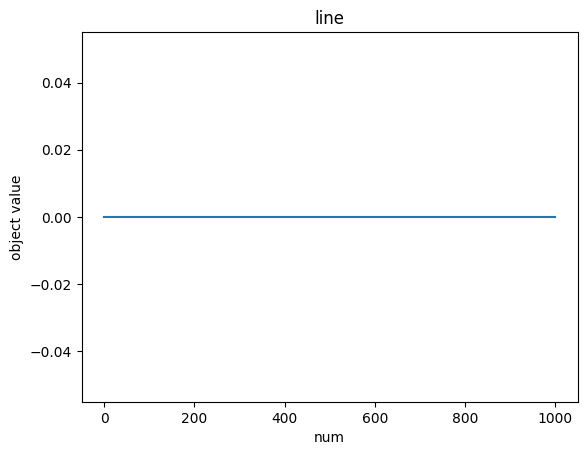

In [3]:
SearchAgents_no=50 # 麻雀数量初始化
Function_name='F7' # 标准测试函数
Max_iteration=1000  # 最大迭代次数
[lb,ub,dim]=Parameters(Function_name)  # 选择单峰测试函数为Function_name
[fMin,bestX,SSA_curve]=SSA(SearchAgents_no,Max_iteration,lb,ub,dim,Function_name)
print(['最优值为：',fMin])
print(['最优变量为：',bestX])
thr1=np.arange(len(SSA_curve[0,:]))
plt.plot(thr1, SSA_curve[0,:])
plt.xlabel('num')
plt.ylabel('object value')
plt.title('line')
plt.show()